In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats

In [5]:
df1 = pd.read_csv('/content/drive/MyDrive/bank-additional-full.csv', sep=';')

df = pd.concat([df1], axis=0)
df.reset_index(drop=True, inplace=True)
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
# Check shape

print("Shape of dataset:", df.shape)

Shape of dataset: (41188, 21)


In [7]:
# Data types
print("\nData types:\n", df.dtypes)


Data types:
 age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object


In [8]:
# Summary statistics
print("\nSummary Statistics:\n", df.describe(include='all'))


Summary Statistics:
                 age     job  marital          education default housing  \
count   41188.00000   41188    41188              41188   41188   41188   
unique          NaN      12        4                  8       3       3   
top             NaN  admin.  married  university.degree      no     yes   
freq            NaN   10422    24928              12168   32588   21576   
mean       40.02406     NaN      NaN                NaN     NaN     NaN   
std        10.42125     NaN      NaN                NaN     NaN     NaN   
min        17.00000     NaN      NaN                NaN     NaN     NaN   
25%        32.00000     NaN      NaN                NaN     NaN     NaN   
50%        38.00000     NaN      NaN                NaN     NaN     NaN   
75%        47.00000     NaN      NaN                NaN     NaN     NaN   
max        98.00000     NaN      NaN                NaN     NaN     NaN   

         loan   contact  month day_of_week  ...      campaign         pdays  

In [9]:
# 2. Null Values Check
# Count missing values per column

print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [10]:
# Find columns with NaN values and count of NaNs in each column
nan_columns = df.isnull().sum()

# Filter only columns that have at least one NaN
nan_columns = nan_columns[nan_columns > 0]

print("Columns with NaN values and their counts:")
print(nan_columns)

Columns with NaN values and their counts:
Series([], dtype: int64)


Here No Null value in this Dataset

y
no     36548
yes     4640
Name: count, dtype: int64


/tmp/ipython-input-3011817269.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target, data=df, palette="Set2")


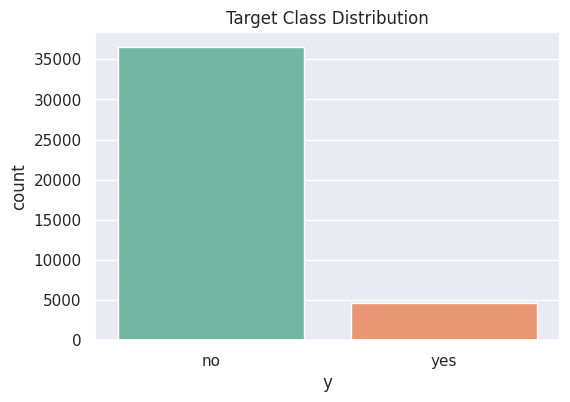

In [11]:
# EDA on Target Column
target = "y"

# Class distribution
print(df[target].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x=target, data=df, palette="Set2")
plt.title("Target Class Distribution")
plt.show()

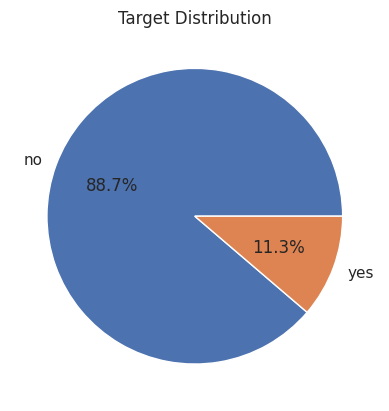

In [12]:
# Pie chart
df[target].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Target Distribution")
plt.ylabel("")
plt.show()

In [13]:
# 5. Find Non-Numeric Columns

non_numeric = df.select_dtypes(exclude=np.number).columns
print("\nNon-Numeric Columns:", list(non_numeric))


Non-Numeric Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


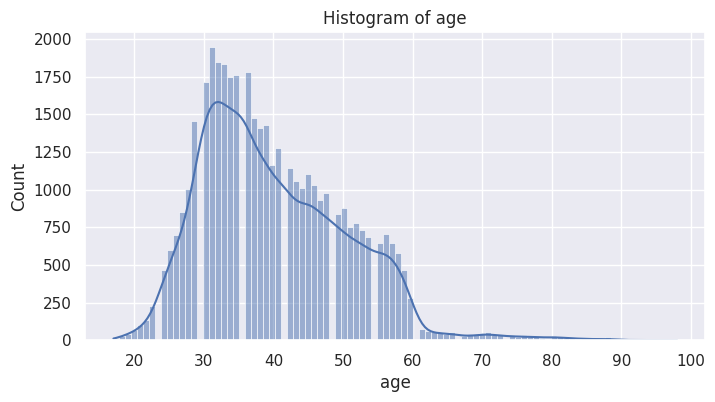

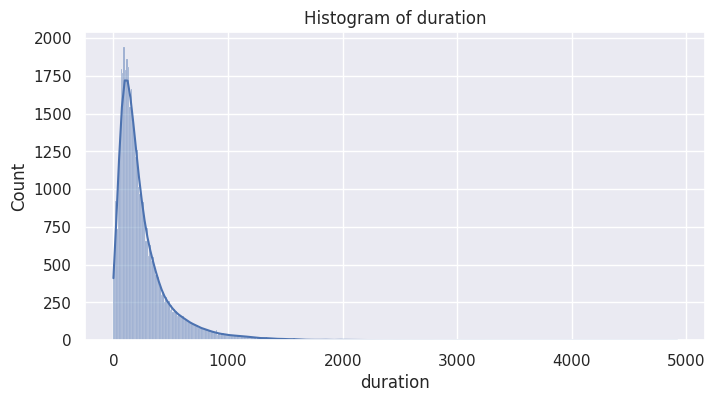

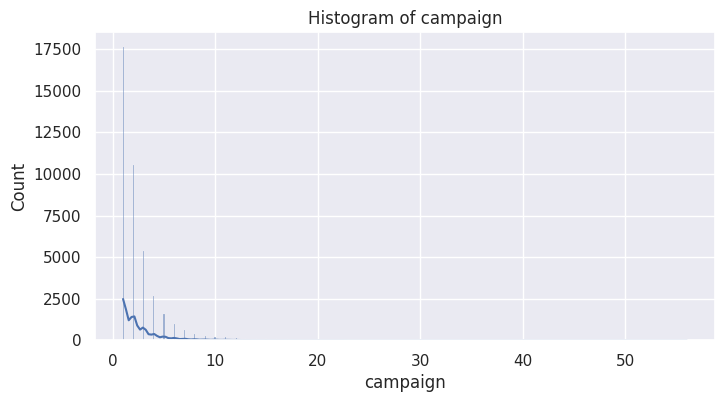

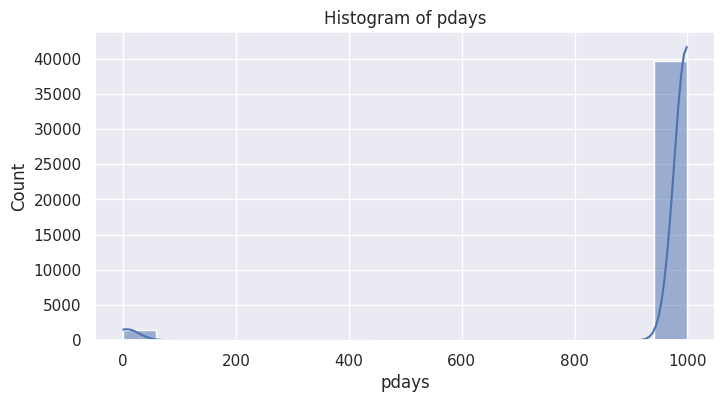

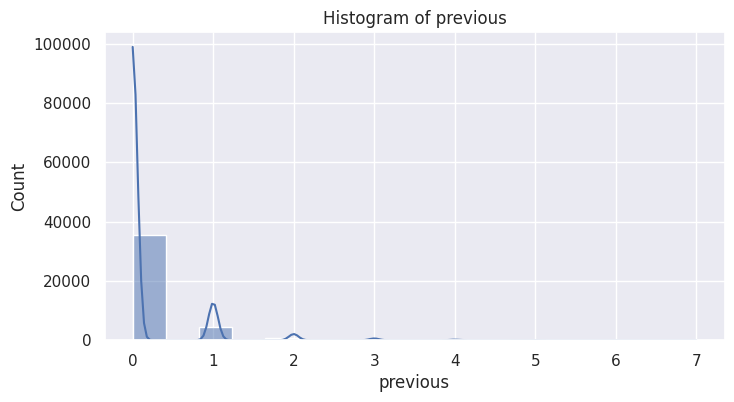

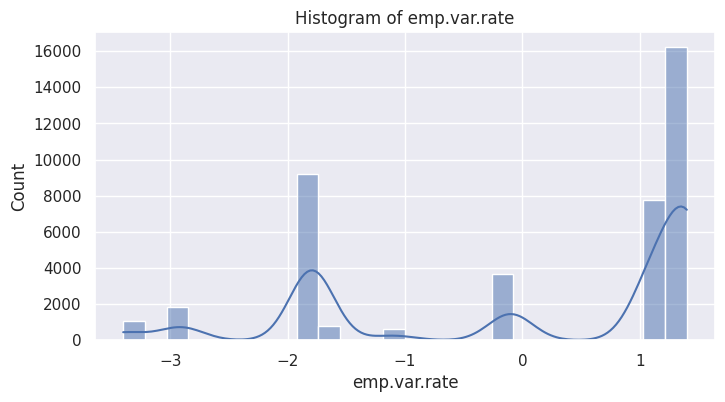

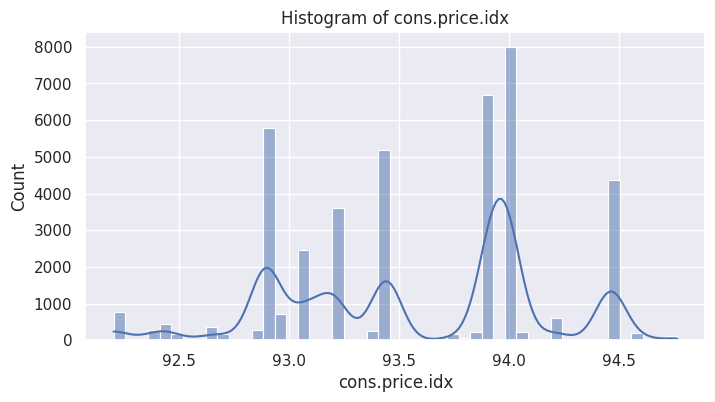

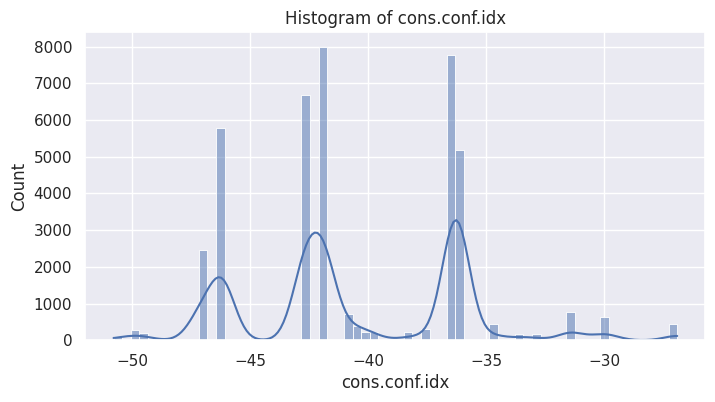

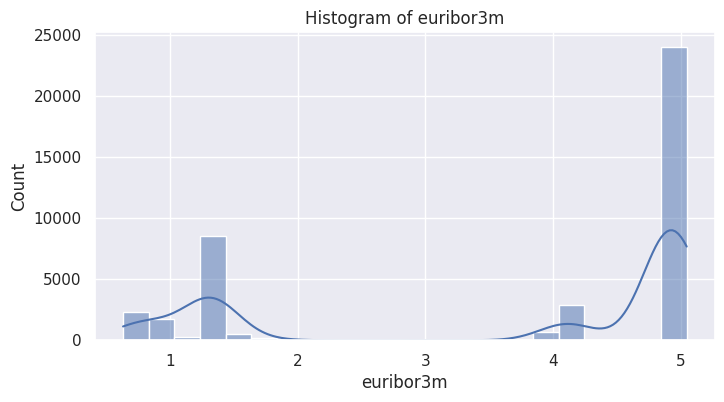

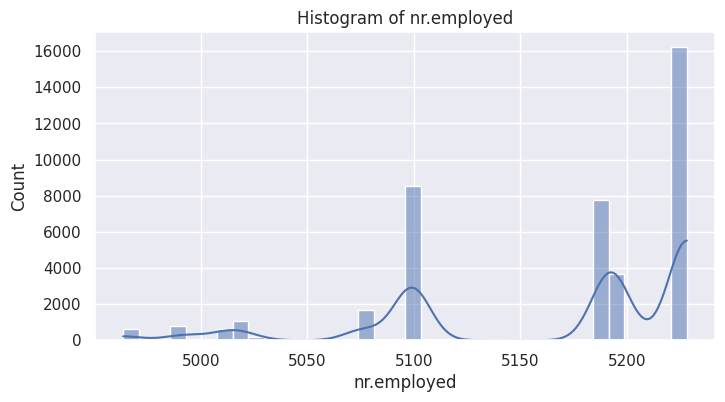

In [14]:
# Identify numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# EDA on Numerical Features
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.show()

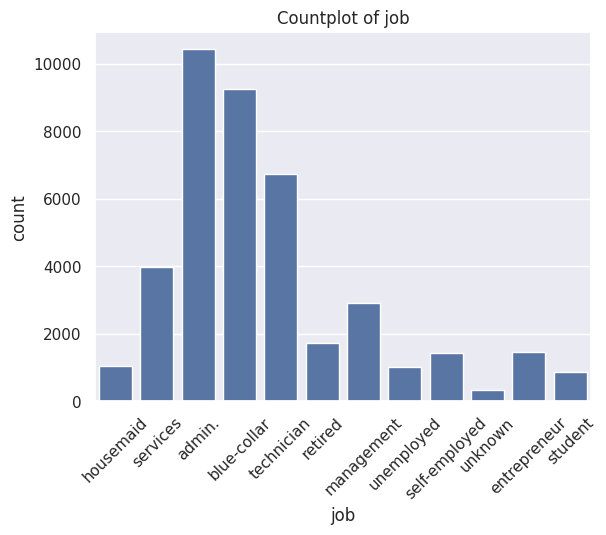

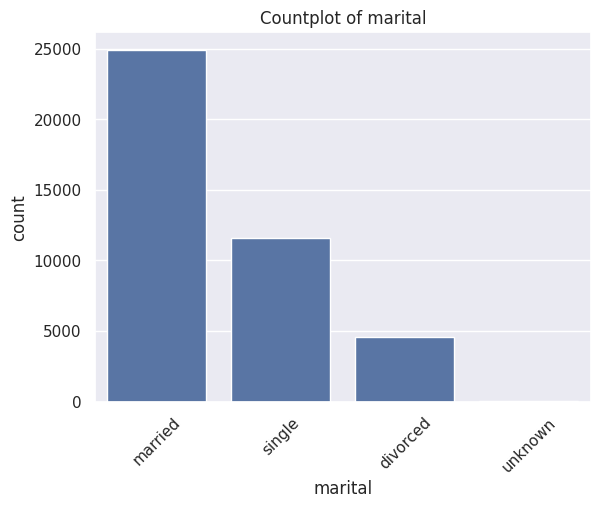

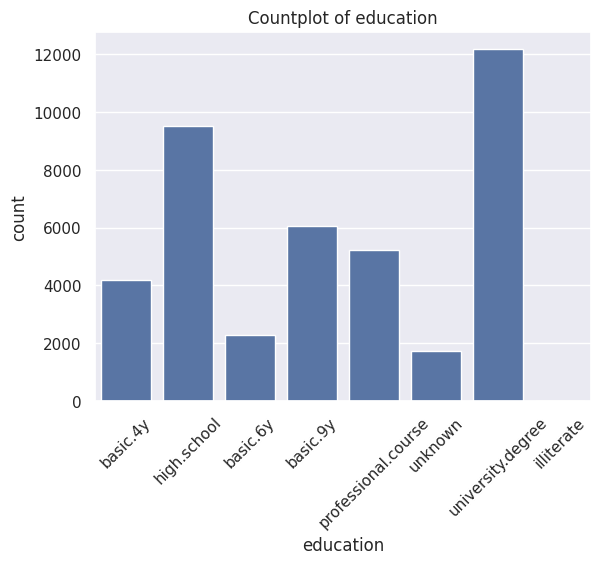

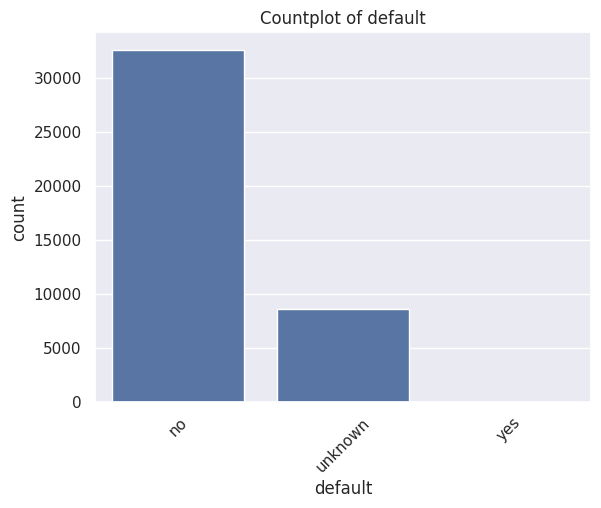

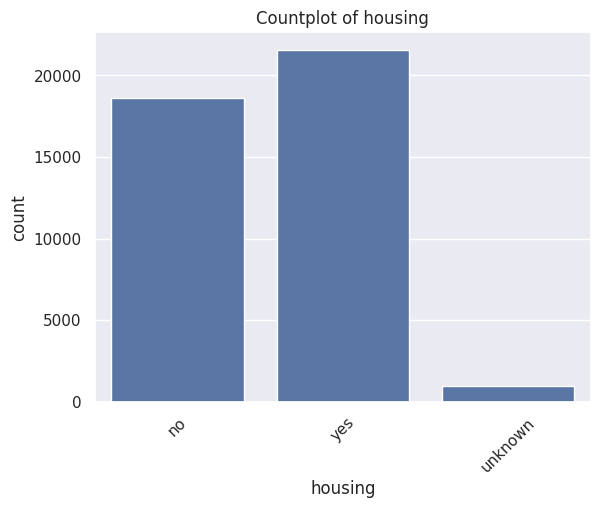

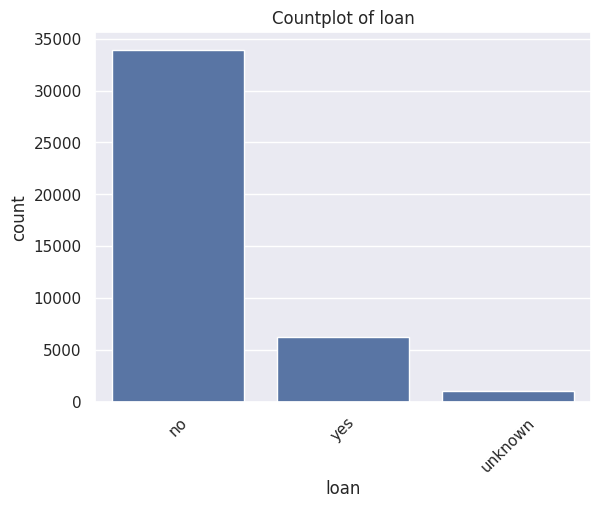

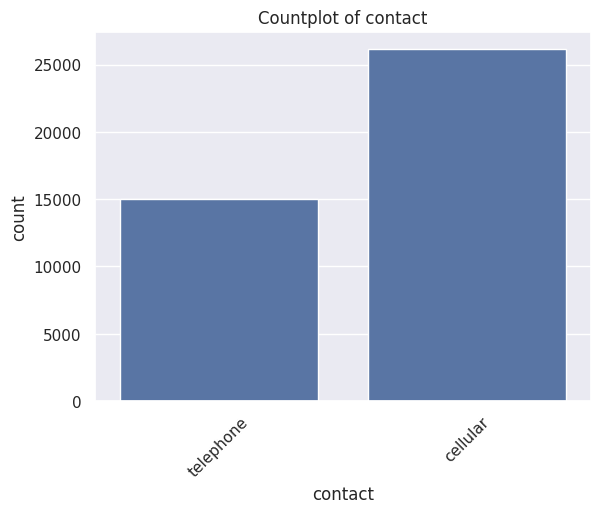

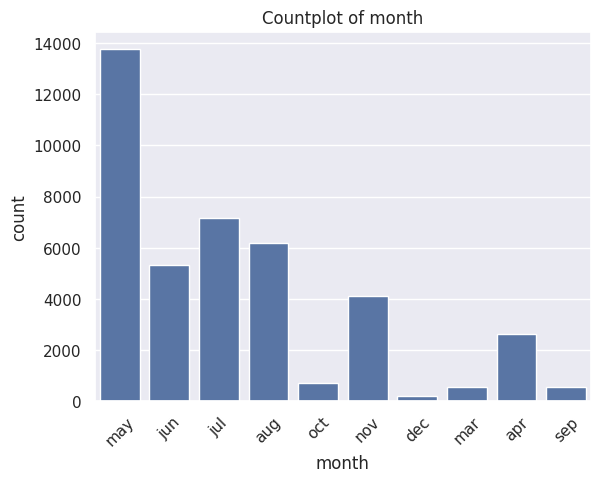

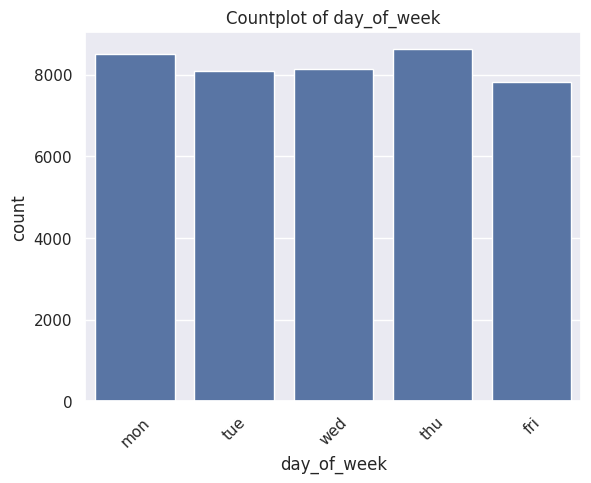

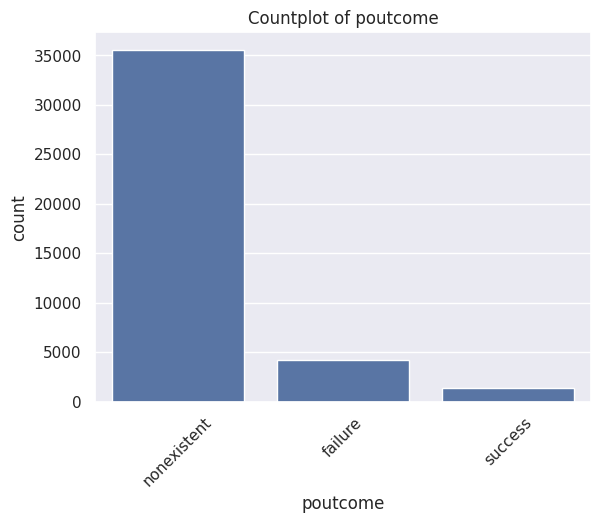

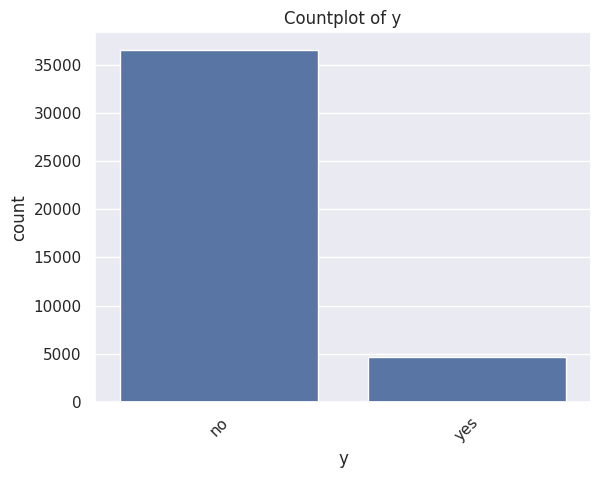

In [15]:
# Categorical features
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    plt.figure()
    sns.countplot(x=col, data=df)
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.show()

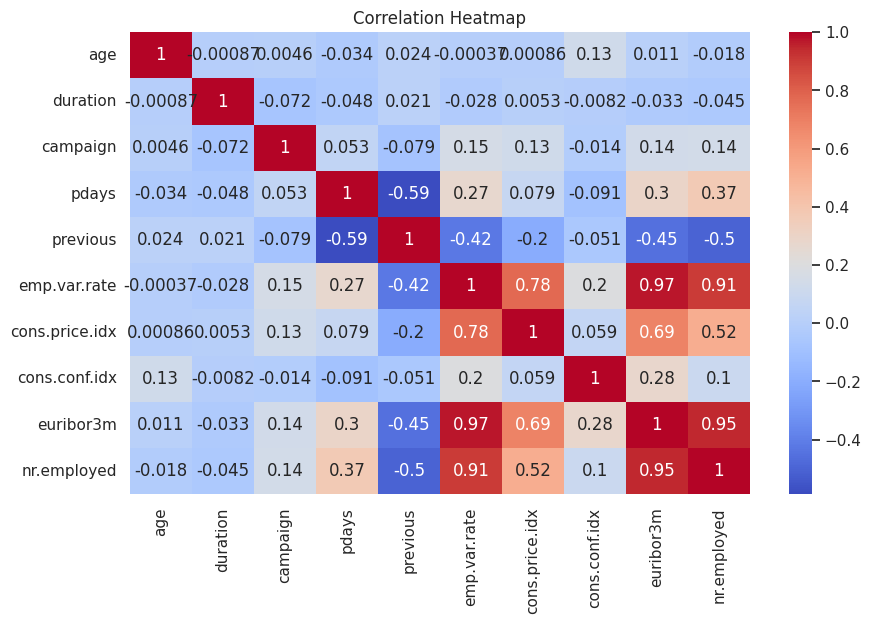

In [16]:
# Correlation heatmap
plt.figure(figsize=(10,6))

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=np.number)

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [17]:
# 7. Standardize Target Column

df[target] = df[target].replace({"yes":1, "no":0})  # Correct mapping
df[target] = df[target].astype(int)

/tmp/ipython-input-3293206211.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[target] = df[target].replace({"yes":1, "no":0})  # Correct mapping


In [18]:
# 8. Encoding Categorical Variables
from sklearn.preprocessing import LabelEncoder

# Label Encoding for binary categories
le = LabelEncoder()
for col in cat_cols:
    if df[col].nunique() == 2:
        df[col] = le.fit_transform(df[col])


In [19]:
# One-Hot Encoding for nominal categories
df = pd.get_dummies(df, columns=[col for col in cat_cols if df[col].nunique() > 2], drop_first=True)

In [20]:
#  Features After Encoding

print("Shape after encoding:", df.shape)

Shape after encoding: (41188, 54)


In [21]:
# Outlier Detection

from scipy import stats

z_scores = np.abs(stats.zscore(df[num_cols]))
df = df[(z_scores < 3).all(axis=1)]  # keep rows with z<3
print("Shape after outlier removal:", df.shape)

Shape after outlier removal: (37314, 54)


Training set shape: (29851, 53)
Test set shape: (7463, 53)
Original class distribution in train set:
 y
0    27477
1     2374
Name: count, dtype: int64
Selected features: ['contact', 'duration', 'emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed', 'month_mar', 'month_may', 'month_oct', 'month_sep']


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 4 52] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Class distribution after SMOTE:
 y
0    27477
1    27477
Name: count, dtype: int64

Logistic Regression
Training Accuracy: 0.8648
Test Accuracy: 0.8481
Test ROC-AUC: 0.9288

Classification Report on Train Set:
              precision    recall  f1-score   support

          No       0.87      0.85      0.86     27477
         Yes       0.86      0.88      0.87     27477

    accuracy                           0.86     54954
   macro avg       0.87      0.86      0.86     54954
weighted avg       0.87      0.86      0.86     54954

Classification Report on Test Set:
              precision    recall  f1-score   support

          No       0.99      0.85      0.91      6869
         Yes       0.33      0.88      0.48       594

    accuracy                           0.85      7463
   macro avg       0.66      0.86      0.70      7463
weighted avg       0.94      0.85      0.88      7463

TN=5807, FP=1062, FN=72, TP=522


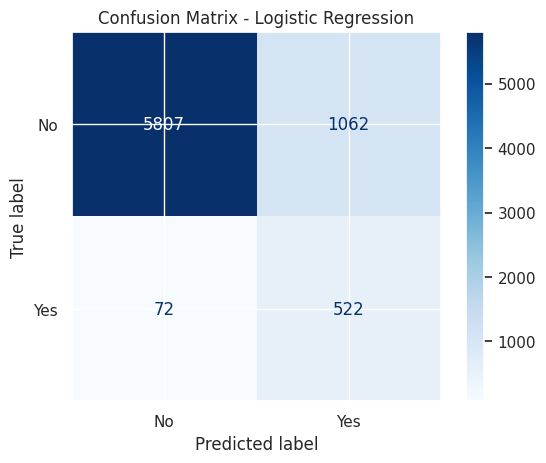

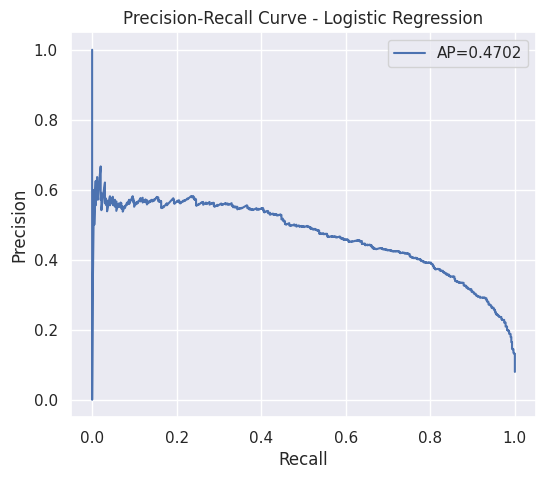

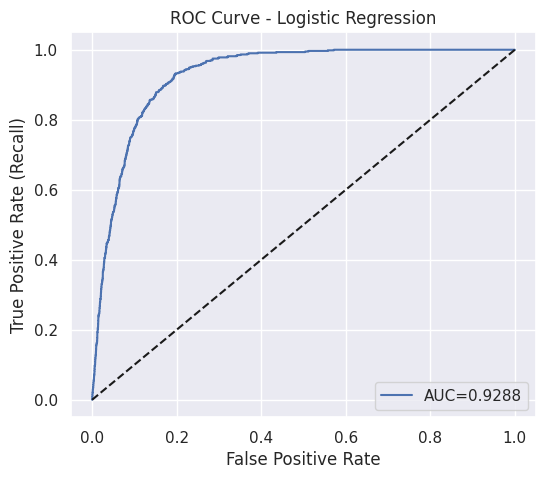


Support Vector Machine
Training Accuracy: 0.8783
Test Accuracy: 0.8168
Test ROC-AUC: 0.9267

Classification Report on Train Set:
              precision    recall  f1-score   support

          No       0.93      0.82      0.87     27477
         Yes       0.84      0.94      0.89     27477

    accuracy                           0.88     54954
   macro avg       0.88      0.88      0.88     54954
weighted avg       0.88      0.88      0.88     54954

Classification Report on Test Set:
              precision    recall  f1-score   support

          No       0.99      0.81      0.89      6869
         Yes       0.29      0.93      0.45       594

    accuracy                           0.82      7463
   macro avg       0.64      0.87      0.67      7463
weighted avg       0.94      0.82      0.85      7463

TN=5545, FP=1324, FN=43, TP=551


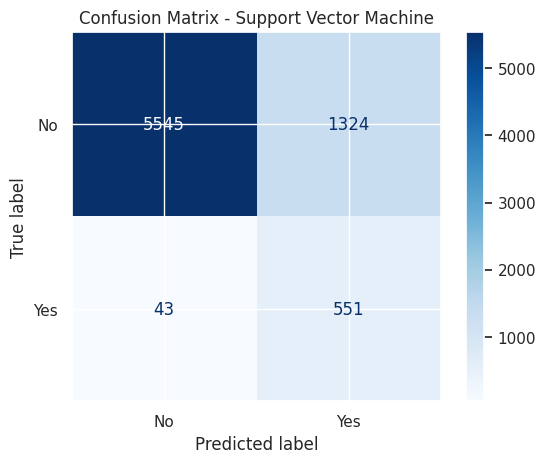

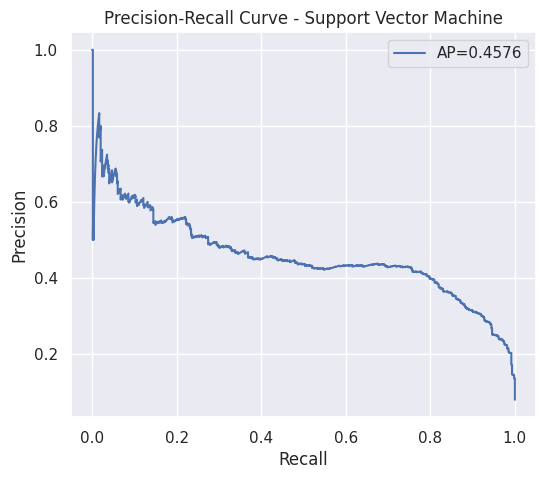

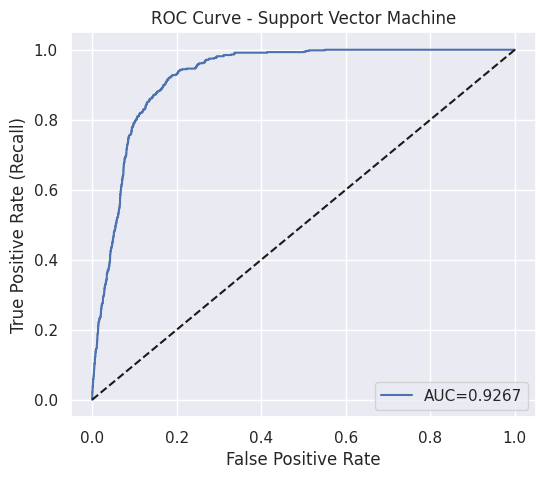


Decision Tree
Training Accuracy: 0.9968
Test Accuracy: 0.8982
Test ROC-AUC: 0.7102

Classification Report on Train Set:
              precision    recall  f1-score   support

          No       0.99      1.00      1.00     27477
         Yes       1.00      0.99      1.00     27477

    accuracy                           1.00     54954
   macro avg       1.00      1.00      1.00     54954
weighted avg       1.00      1.00      1.00     54954

Classification Report on Test Set:
              precision    recall  f1-score   support

          No       0.95      0.93      0.94      6869
         Yes       0.39      0.48      0.43       594

    accuracy                           0.90      7463
   macro avg       0.67      0.71      0.69      7463
weighted avg       0.91      0.90      0.90      7463

TN=6417, FP=452, FN=308, TP=286


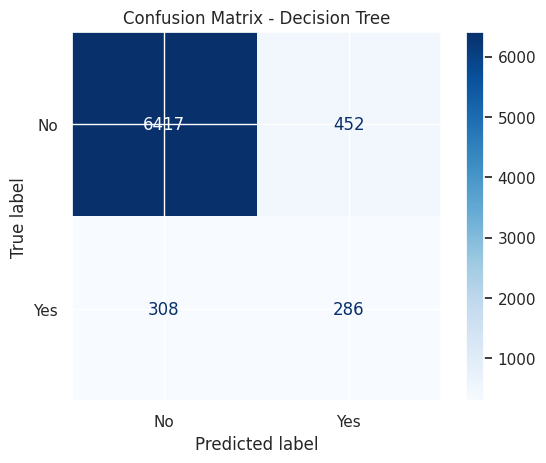

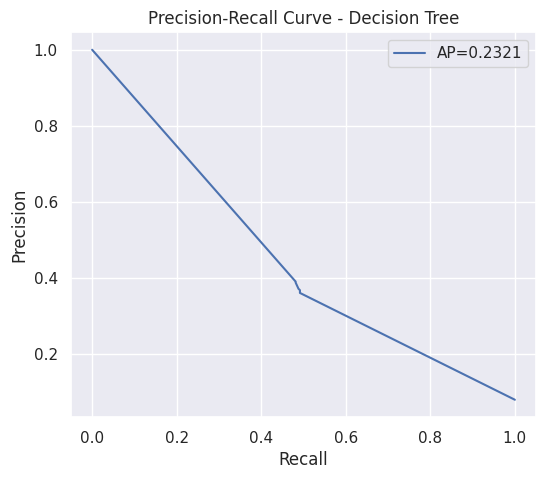

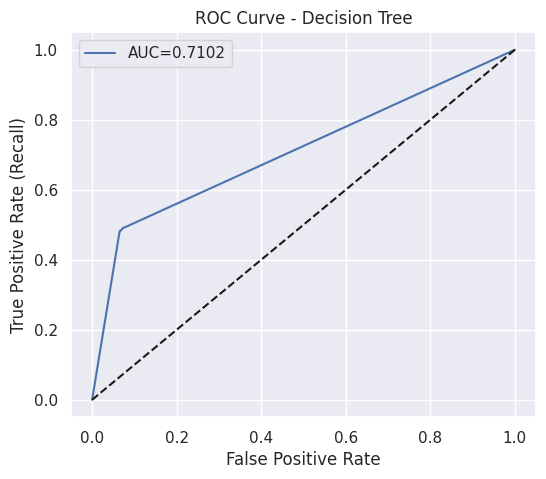


Random Forest
Training Accuracy: 0.9968
Test Accuracy: 0.9015
Test ROC-AUC: 0.8950

Classification Report on Train Set:
              precision    recall  f1-score   support

          No       1.00      1.00      1.00     27477
         Yes       1.00      1.00      1.00     27477

    accuracy                           1.00     54954
   macro avg       1.00      1.00      1.00     54954
weighted avg       1.00      1.00      1.00     54954

Classification Report on Test Set:
              precision    recall  f1-score   support

          No       0.96      0.94      0.95      6869
         Yes       0.41      0.51      0.45       594

    accuracy                           0.90      7463
   macro avg       0.68      0.72      0.70      7463
weighted avg       0.91      0.90      0.91      7463

TN=6423, FP=446, FN=289, TP=305


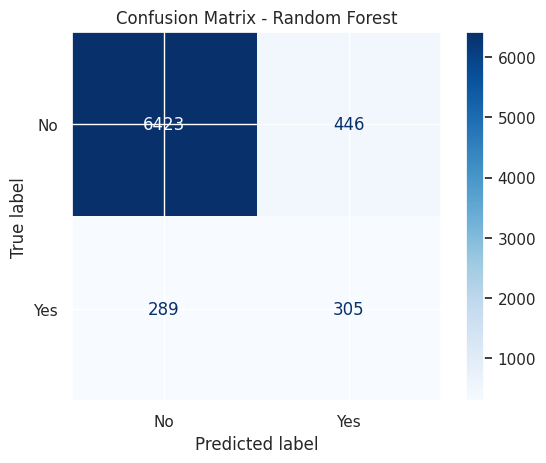

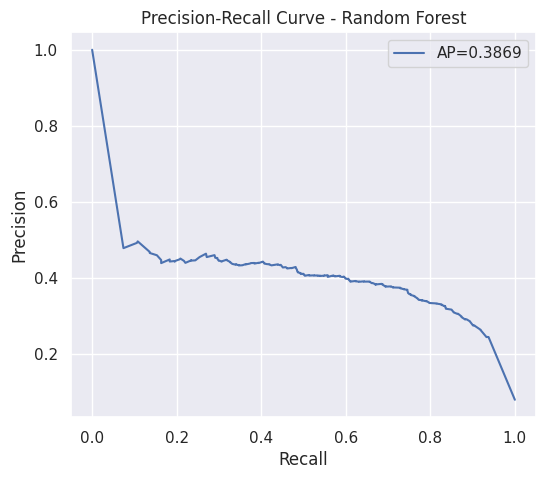

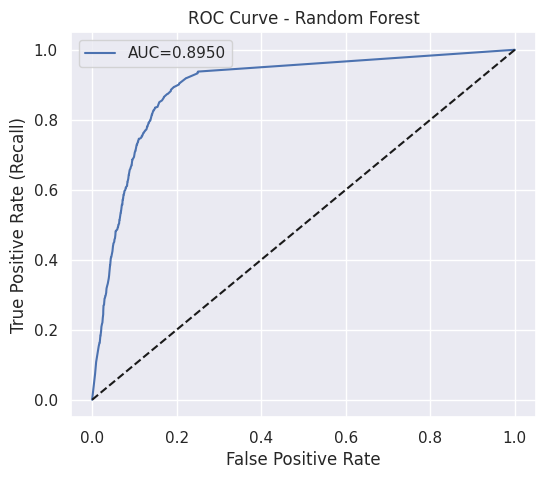

In [22]:
# --- Imports ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    ConfusionMatrixDisplay, roc_auc_score, precision_recall_curve,
    average_precision_score, roc_curve
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# --- SMOTE ---
from imblearn.over_sampling import SMOTE

# -------------------------
# 1. Separate Features and Labels
X = df.drop(target, axis=1)
y = df[target]

# -------------------------
# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Original class distribution in train set:\n", y_train.value_counts())

# -------------------------
# 3. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------
# 4. Feature Selection (ANOVA F-test)
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

selected_features = X.columns[selector.get_support()]
print("Selected features:", selected_features.tolist())

# -------------------------
# 5. Apply SMOTE on training data
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_selected, y_train)
print("Class distribution after SMOTE:\n", pd.Series(y_train_bal).value_counts())

# -------------------------
# 6. Initialize Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "Support Vector Machine": SVC(class_weight='balanced', probability=True),
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced')
}

# -------------------------
# 7. Train & Evaluate Models
for name, model in models.items():
    print(f"\n{'='*40}\n{name}")

    # Train the model on SMOTE data
    model.fit(X_train_bal, y_train_bal)

    # Predictions
    y_train_pred = model.predict(X_train_bal)
    y_test_pred = model.predict(X_test_selected)

    # Accuracy
    train_acc = accuracy_score(y_train_bal, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    # ROC-AUC
    if hasattr(model, "predict_proba"):
        y_test_proba = model.predict_proba(X_test_selected)[:,1]
    else:  # For SVC
        y_test_proba = model.decision_function(X_test_selected)
    roc = roc_auc_score(y_test, y_test_proba)

    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")
    print(f"Test ROC-AUC: {roc:.4f}")

    # Classification Reports
    print("\nClassification Report on Train Set:")
    print(classification_report(y_train_bal, y_train_pred, target_names=["No", "Yes"]))

    print("Classification Report on Test Set:")
    print(classification_report(y_test, y_test_pred, target_names=["No", "Yes"]))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred, labels=[0,1])
    TN, FP, FN, TP = cm.ravel()
    print(f"TN={TN}, FP={FP}, FN={FN}, TP={TP}")

    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

    # -------------------------
    # Precision-Recall Curve
    precision, recall, thresholds = precision_recall_curve(y_test, y_test_proba)
    avg_precision = average_precision_score(y_test, y_test_proba)

    plt.figure(figsize=(6,5))
    plt.plot(recall, precision, label=f'AP={avg_precision:.4f}')
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve - {name}")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

    # -------------------------
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, label=f"AUC={roc:.4f}")
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.title(f"ROC Curve - {name}")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()
